In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import itertools
from collections import Counter
import nltk
from nltk.stem.snowball import SnowballStemmer

import string
from nltk import wordpunct_tokenize

from wordcloud import WordCloud
from datetime import datetime
import pickle
import re

#progress bar
from tqdm import tqdm, tqdm_notebook

# instantiate
tqdm.pandas(tqdm_notebook)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/home/rpo/workspace/git/dataanalyticsproject/src/venv/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


### Scommentare se si usano i dati iniziali

In [5]:
dataReviewsChunk = pd.read_json('../data/reviews.json', lines=True, chunksize=10000)

In [6]:
dataReviewsChunk

In [7]:

chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in dataReviewsChunk:

    chunk_list.append(chunk)

In [8]:
dataReviews = pd.concat(chunk_list)

In [ ]:
## elimino recensioni non verificate e quelli con helpfull == 0

In [13]:
def convert_to_int(field):
    return field["$numberInt"]

In [14]:
dataReviews["rating"]=dataReviews["rating"].apply(convert_to_int).astype(int)

In [17]:
dataReviews["helpful"]=dataReviews["helpful"].apply(convert_to_int).astype(int)

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["verified"] == True]'''

In [ ]:
'''len(dataReviews.loc[dataReviews["verified"] == False])'''

In [ ]:
'''len(dataReviews.loc[dataReviews["helpful"] == 0]) - len(dataReviews.loc[dataReviews["helpful"] != 0])'''

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["helpful"] != 0]
dataReviews'''

### Dati filtrati (vedi sopra)

In [ ]:
dataReviews = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [ ]:
dataReviews

In [ ]:
counts = dataReviews["rating"].value_counts()

In [ ]:
counts.values

In [ ]:
x = counts._index
print(x)
y = counts.values
print(y)

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [ ]:
print("Proportion of review with score=1: {}%".format(len(dataReviews[dataReviews.rating == 1]) / len(dataReviews)*100))
print("Proportion of review with score=2: {}%".format(len(dataReviews[dataReviews.rating == 2]) / len(dataReviews)*100))
print("Proportion of review with score=3: {}%".format(len(dataReviews[dataReviews.rating == 3]) / len(dataReviews)*100))
print("Proportion of review with score=4: {}%".format(len(dataReviews[dataReviews.rating == 4]) / len(dataReviews)*100))
print("Proportion of review with score=5: {}%".format(len(dataReviews[dataReviews.rating == 5]) / len(dataReviews)*100))

In [ ]:
# recensioni vuote
dataReviews[dataReviews["body"].str.len() == 0]

In [ ]:
dataReviews.loc[dataReviews['rating'] == 3 , 'polarity'] = 'neutral'
dataReviews.loc[dataReviews['rating'] > 3 , 'polarity'] = 'positive'
dataReviews.loc[dataReviews['rating'] < 3 , 'polarity'] = 'negative'

In [ ]:
counts = dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [ ]:
def undersampling(df):
    positive, negative, _ = df.polarity.value_counts()
    df_positive = df[df.polarity == 'positive']
    df_positive = df_positive.sample(negative, random_state=1)
    df_negative = df[df.polarity == 'negative']
    df = pd.concat([df_positive, df_negative])
    #df = df.sample(frac=1)
    return df

In [ ]:
new_dataReviews = undersampling(dataReviews)

In [ ]:
counts = new_dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

### Funzioni varie

In [ ]:
def flat_list(l):
    return  [item for sublist in l for item in sublist]

In [ ]:
def plot_common_tokens(tokens, title, n=20):
    sentences = (list(itertools.chain(tokens)))
    flat_sentences = flat_list(sentences)
    counts = Counter(flat_sentences)
    #print(counts.most_common(30))
    common_words = [word[0] for word in counts.most_common(n)]
    common_counts = [word[1] for word in counts.most_common(n)]
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=common_words, y=common_counts)
    plt.title(title)
    plt.show()

In [ ]:
def word_Cloud(sentences):
    flat_sentences = flat_list(sentences)
    unique_string=(" ").join(flat_sentences)

    wordcloud = WordCloud(background_color="white").generate(unique_string)
    plt.figure(figsize = (10, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Tokenizzazione

In [ ]:
new_dataReviews['token']=new_dataReviews['body'].progress_apply(word_tokenize)

In [ ]:
#new_dataReviews['token'] #Name: token, Length: 130648, dtype: object

### Stopwords

In [68]:
stop_words=nltk.corpus.stopwords.words('italian')
stop_words

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["token"].progress_apply(lambda sentence : [word for word in sentence if word.lower() not in stop_words])

### Punctuation

In [70]:
punctuation = string.punctuation
punctuation = punctuation + "..."+ "''" + "``" + "--"+ ".."
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~...''``--..


In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if word not in punctuation])

### Numbers

In [ ]:
regex_numbers = r'(?:(?:\d+,?)+(?:\.?\d+)?)'

In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [re.sub(regex_numbers,"",word) for word in sentence if re.sub(regex_numbers,"",word) != ""])

### Eliminazione token di lunghezza 1

In [ ]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if len(word)> 1])

In [ ]:
new_dataReviews.to_csv("dati_puliti.csv")

In [ ]:
plot_common_tokens(new_dataReviews['cleaned'],'Most Common Tokens used in Reviews')

In [ ]:
word_Cloud(new_dataReviews["cleaned"])

In [ ]:
sentences = (list(itertools.chain(new_dataReviews["cleaned"])))
flat_sentences = flat_list(sentences)
counts = Counter(flat_sentences)
counts.most_common()

### Stemming

In [71]:
stemmer = SnowballStemmer("italian")
def stemming_token(sentence,stemmer):
    stem = []
    for elem in sentence:
        stem.append(stemmer.stem(elem))
    return stem

In [ ]:
new_dataReviews["stemming"]=[stemming_token(row["cleaned"], stemmer) for _, row in tqdm(new_dataReviews.iterrows())]

In [ ]:
#new_dataReviews = pd.read_csv("../data/dati_finali.csv", sep=",", index_col=0)

In [ ]:
### da fare solo se si legge il csv finale

In [ ]:
#def str_to_list(sentence):
#   return ast.literal_eval(sentence)

In [ ]:
#import ast

#new_dataReviews["stemming"] = new_dataReviews["stemming"].progress_apply(str_to_list)

In [ ]:
len(new_dataReviews)

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
count_vect = CountVectorizer(stop_words=None, lowercase=True)
#lowercase = true -> Convert all characters to lowercase before tokenizing.
#stop_words = None -> If None, no stop words will be used
bow = count_vect.fit(new_dataReviews['stemming'].apply(lambda x: " ".join(x)))

In [ ]:
import pickle
with open('../model/bow.bin', 'wb') as f:
    pickle.dump(bow, f, pickle.HIGHEST_PROTOCOL)
#s = pickle.dumps(model)

In [64]:
with open('../model/bow.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    bow = pickle.load(f)

/home/rpo/workspace/git/dataanalyticsproject/src/venv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
count_vect

In [ ]:
bow.get_feature_names()[::2000]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(bow, new_dataReviews['polarity'], test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(new_dataReviews['stemming'].apply(lambda x: " ".join(x)), new_dataReviews['polarity'], test_size=0.2, random_state=1)    

In [ ]:
print("train size: ",len(X_train))
print("test size:",len(X_test))

In [ ]:
print("y train distribution:\n",y_train.value_counts())
print("y train distribution:\n",y_test.value_counts())

In [ ]:
model = LogisticRegression()
model.fit(bow.transform(X_train), y_train)

In [ ]:
predictions = model.predict(bow.transform(X_test))

In [ ]:
predictions

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions)

In [ ]:
confusion_matrix(y_test, predictions)

In [66]:
def clean_sentence(sentence):
    tokens = word_tokenize(sentence)
    tokens_clean = []
    for word in tokens:
        if word.lower() not in stop_words and word.lower() not in punctuation and not word.isnumeric() and len(word)> 1:
            
            tokens_clean.append(stemmer.stem(word))
    return ' '.join(tokens_clean)

In [ ]:
sentence="belle le scarpe e le stringhe per il colore , però sono comode"

In [ ]:
clean_sentence(sentence)

In [ ]:
print(bow.transform([clean_sentence(sentence)]))

In [ ]:
model.predict(bow.transform([clean_sentence(sentence)]))

In [ ]:

with open('../model/model.bin', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
#s = pickle.dumps(model)

In [62]:
with open('../model/model.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    model = pickle.load(f)

/home/rpo/workspace/git/dataanalyticsproject/src/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/rpo/workspace/git/dataanalyticsproject/src/venv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
model.predict(bow.transform([clean_sentence(sentence)]))

### Sentimenti recensioni neutre

In [ ]:
#dataReviews_neutre = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [73]:
dataReviews_neutre = dataReviews.loc[dataReviews["rating"]==3]

In [ ]:
dataReviews_neutre

In [ ]:
dataReviews_neutre["polarity"] = dataReviews_neutre["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)])))

In [ ]:
dataReviews_neutre["polarity"]

In [ ]:
print("Proportion of review with score=3 that is positive: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "positive"]) / len(dataReviews_neutre)*100))
print("Proportion of review with score=3 that is negative: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "negative"]) / len(dataReviews_neutre)*100))

In [ ]:
dataReviews_neutre["polarity"].value_counts().plot(kind="bar")


### Prodotti nel tempo

In [4]:
dataReviewsReduced = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

FileNotFoundError: [Errno 2] File ../data/dati_ridotti.csv does not exist: '../data/dati_ridotti.csv'

In [18]:
# look for good examples
dataReviews.groupby('product').count().sort_values('_id', ascending=False).head(10)

,_id,title,author-id,author-name,date,rating,helpful,verified,body
product,,,,,,,,,
B01ETRGE7M,5000,5000,5000,5000,5000,5000,5000,5000,5000
B00KWHJY7Q,5000,5000,5000,5000,5000,5000,5000,5000,5000
B00Z8X34QG,4272,4272,4272,4272,4272,4272,4272,4272,4272
B00G9WHN12,3638,3638,3638,3638,3638,3638,3638,3638,3638
B01A8IEG2G,3550,3550,3550,3550,3550,3550,3550,3550,3550
B00IBDVTSU,3519,3519,3519,3519,3519,3519,3519,3519,3519
B000J34HN4,3173,3173,3173,3173,3173,3173,3173,3173,3173
B0792HCFTG,3031,3031,3031,3031,3031,3031,3031,3031,3031
B0058BXHWE,2989,2989,2989,2989,2989,2989,2989,2989,2989


In [74]:
# GOOD EXAMPLES:
# B01ETRGE7M bello
# B00LPHUTOO altalena
# B01EWQ10D8 non male
# B0058BXHWE resegono
# ... non ne ho piu provati di quelli del box sopra
prod = "B01ETRGE7M" 
dataReviews_prodotto = dataReviews[dataReviews["product"]  == prod]
len(dataReviews_prodotto)

5000

In [75]:
dataReviews_prodotto["Period"] = dataReviews_prodotto["date"].apply(lambda x: x.strftime('%Y-%m'))

<ipython-input-75-443dc5dabb87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataReviews_prodotto["Period"] = dataReviews_prodotto["date"].apply(lambda x: x.strftime('%Y-%m'))


In [76]:
dataReviews_prodotto["Period"].iloc[0]

'2019-01'

In [60]:
dataReviews_prodotto

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body
15374,R1JWRYRD2QJBPU,B01ETRGE7M,very good,AFFXBJ3HLCETFAMKAWAX2STT2NCA,Xxxx,2019-01,5,252,True,"Utile e funzionale, da acquistare"
15375,R2YNQPDQNTKRW7,B01ETRGE7M,inmancabile,AFADQ5CXWECICH4PZQKY5KJ63YTQ,sebastiano,2017-12,5,240,True,devo dire che questa piccola pennetta da attac...
15376,R1YM94DSZI7K7R,B01ETRGE7M,Talmente entusiasta che già l'ho consigliato a...,AGSGI4XBH46OAS46EATYOVDKTPEA,Spiaggia dei Maronti,2018-10,4,447,True,Come nel titolo.\nTalmente entusiasta che già ...
15377,R37AGG061VEJIA,B01ETRGE7M,Non c’è il tasto Search! Assurdo. Devi cercare...,AGQNCTJHHDUIPBQTSLZOLTOJVSAA,lu239,2018-09,2,144,True,Non c’è il tasto Search. Se scarichi qualcosa ...
15378,R1CV0GOGENYYX8,B01ETRGE7M,Staconsigliata! NETFLIX - INFINITY - AMAZON PR...,AFNCTVOMQMNJDHTETJL4FZPYBXYQ,Soad,2019-01,5,1,True,"Che dire, straconsigliata.\nCercherò di scrive..."
...,...,...,...,...,...,...,...,...,...,...
20369,R4YXVR6BOGXBX,B01ETRGE7M,ottimo prodotto,AEQC2KZ4WMMGSVJU2HEUCEMSTTVQ,Fabrizio fzack,2019-01,5,0,True,facilissimo da installare e molto intuitivo l'...
20370,R1P9PMXBR4TTI2,B01ETRGE7M,Ottimo prodotto,AH7422HABQTCHBH5JZPAE2FWIBKA,davide,2019-02,5,0,True,Ottimo prodotto rapporto qualità prezzo. Servi...
20371,R133QGMTH7LR4,B01ETRGE7M,perfetto,AGR5IHJJL3UJSENEF2UJSIOSFUHA,Antonio Capodicasa,2019-02,5,0,True,inserita in presa hdmi...un altro mondo si apr...
20372,R2YHNJX1BI1GB5,B01ETRGE7M,Da acquistare,AGE6N4OACTDSWASEREVYE4M3XR3Q,Luigi,2019-02,5,0,True,Me avrò compare almeno 4. Sostituisce in tutti...


In [77]:
dataReviews_prodotto["polarity"] = dataReviews_prodotto["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)]))[0])

100%|██████████| 5000/5000 [00:17<00:00, 285.86it/s]
<ipython-input-77-7a09702d783b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataReviews_prodotto["polarity"] = dataReviews_prodotto["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)]))[0])


In [78]:
dataReviews_prodotto_month = dataReviews_prodotto.groupby(['Period']).progress_apply(lambda x: len(x.loc[x["polarity"]=="positive"])/len(x))

# use the rating intead of polarity
dataReviews_prodotto_month_rat = dataReviews_prodotto.groupby(['Period']).progress_apply(lambda x: len(x.loc[x["rating"]>3])/len(x))




100%|██████████| 18/18 [00:00<00:00, 209.34it/s]


In [79]:
dataReviews_prodotto_month.head(20)

Period
2017-11    0.941176
2017-12    0.910112
2018-01    0.934911
2018-02    0.943396
2018-03    0.910995
2018-04    0.944444
2018-05    0.913462
2018-06    0.925000
2018-07    0.941176
2018-08    0.908571
2018-09    0.922222
2018-10    0.847518
2018-11    0.794626
2018-12    0.841248
2019-01    0.853107
2019-02    0.840319
2019-03    0.859238
2019-04    0.834711
dtype: float64

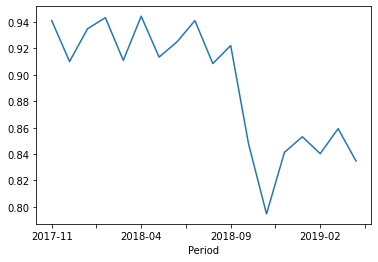

In [80]:
dataReviews_prodotto_month.plot()

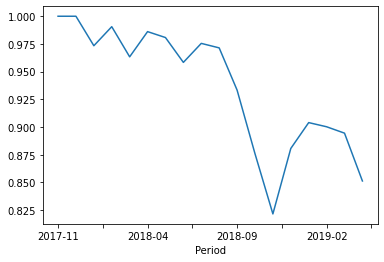

In [81]:
dataReviews_prodotto_month_rat.plot()

In [85]:
pd.ataframe(dataReviews_prodotto_month_rat)

AttributeError: module 'pandas' has no attribute 'Dataframe'